$$ Cohorts of Songs  $$

 **5 May 2024**

**Problem Statment: The customer always looks forward to specialized treatment, whether shopping over an e-commerce website or watching Netflix. They want what they might like to see. To keep the customers engaged, it is also crucial for companies to always present the most relevant information. Spotify is a Swedish audio streaming and media service provider. The company has over 456 million active monthly users, including over 195 million paying subscribers, as of September 2022. The company intends to create cohorts of different songs that will aid in the recommendation of songs to users based on various relevant features. Each cohort would contain similar types of songs**

In [ ]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_excel('rolling_stones_spotify.xlsx')

In [ ]:
df.head()

,Unnamed: 0,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,2IEkywLJ4ykbhi1yRQvmsT,spotify:track:2IEkywLJ4ykbhi1yRQvmsT,0.0824,0.463,0.993,0.996000,0.932,-12.913,0.1100,118.001,0.0302,33,48640
1,1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,6GVgVJBKkGJoRfarYRvGTU,spotify:track:6GVgVJBKkGJoRfarYRvGTU,0.4370,0.326,0.965,0.233000,0.961,-4.803,0.0759,131.455,0.3180,34,253173
2,2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,1Lu761pZ0dBTGpzxaQoZNW,spotify:track:1Lu761pZ0dBTGpzxaQoZNW,0.4160,0.386,0.969,0.400000,0.956,-4.936,0.1150,130.066,0.3130,34,263160
3,3,If You Can't Rock Me - Live,Licked Live In NYC,2022-06-10,4,1agTQzOTUnGNggyckEqiDH,spotify:track:1agTQzOTUnGNggyckEqiDH,0.5670,0.369,0.985,0.000107,0.895,-5.535,0.1930,132.994,0.1470,32,305880
4,4,Donâ€™t Stop - Live,Licked Live In NYC,2022-06-10,5,7piGJR8YndQBQWVXv6KtQw,spotify:track:7piGJR8YndQBQWVXv6KtQw,0.4000,0.303,0.969,0.055900,0.966,-5.098,0.0930,130.533,0.2060,32,305106


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Unnamed: 0        1610 non-null   int64         
 1   name              1610 non-null   object        
 2   album             1610 non-null   object        
 3   release_date      1610 non-null   datetime64[ns]
 4   track_number      1610 non-null   int64         
 5   id                1610 non-null   object        
 6   uri               1610 non-null   object        
 7   acousticness      1610 non-null   float64       
 8   danceability      1610 non-null   float64       
 9   energy            1610 non-null   float64       
 10  instrumentalness  1610 non-null   float64       
 11  liveness          1610 non-null   float64       
 12  loudness          1610 non-null   float64       
 13  speechiness       1610 non-null   float64       
 14  tempo             1610 n

In [ ]:
# Check for duplicates
data = df.drop_duplicates()

In [ ]:
data.head()

,Unnamed: 0,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,2IEkywLJ4ykbhi1yRQvmsT,spotify:track:2IEkywLJ4ykbhi1yRQvmsT,0.0824,0.463,0.993,0.996000,0.932,-12.913,0.1100,118.001,0.0302,33,48640
1,1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,6GVgVJBKkGJoRfarYRvGTU,spotify:track:6GVgVJBKkGJoRfarYRvGTU,0.4370,0.326,0.965,0.233000,0.961,-4.803,0.0759,131.455,0.3180,34,253173
2,2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,1Lu761pZ0dBTGpzxaQoZNW,spotify:track:1Lu761pZ0dBTGpzxaQoZNW,0.4160,0.386,0.969,0.400000,0.956,-4.936,0.1150,130.066,0.3130,34,263160
3,3,If You Can't Rock Me - Live,Licked Live In NYC,2022-06-10,4,1agTQzOTUnGNggyckEqiDH,spotify:track:1agTQzOTUnGNggyckEqiDH,0.5670,0.369,0.985,0.000107,0.895,-5.535,0.1930,132.994,0.1470,32,305880
4,4,Donâ€™t Stop - Live,Licked Live In NYC,2022-06-10,5,7piGJR8YndQBQWVXv6KtQw,spotify:track:7piGJR8YndQBQWVXv6KtQw,0.4000,0.303,0.969,0.055900,0.966,-5.098,0.0930,130.533,0.2060,32,305106


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Unnamed: 0        1610 non-null   int64         
 1   name              1610 non-null   object        
 2   album             1610 non-null   object        
 3   release_date      1610 non-null   datetime64[ns]
 4   track_number      1610 non-null   int64         
 5   id                1610 non-null   object        
 6   uri               1610 non-null   object        
 7   acousticness      1610 non-null   float64       
 8   danceability      1610 non-null   float64       
 9   energy            1610 non-null   float64       
 10  instrumentalness  1610 non-null   float64       
 11  liveness          1610 non-null   float64       
 12  loudness          1610 non-null   float64       
 13  speechiness       1610 non-null   float64       
 14  tempo             1610 n

In [ ]:
print('Missing Values :')
data.isnull().sum()

Missing Values :


Unnamed: 0          0
name                0
album               0
release_date        0
track_number        0
id                  0
uri                 0
acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
duration_ms         0
dtype: int64

In [ ]:

# Recommendation based on popular songs
avg_popularity_per_album = data.groupby('album')['popularity'].mean()
top_albums = avg_popularity_per_album.nlargest(2)
print("\nTop 2 Albums Based on Popular Songs:")
print(top_albums)


Top 2 Albums Based on Popular Songs:
album
Sticky Fingers (Remastered)    53.3
Some Girls                     48.1
Name: popularity, dtype: float64


In [ ]:
import matplotlib.pyplot as plt

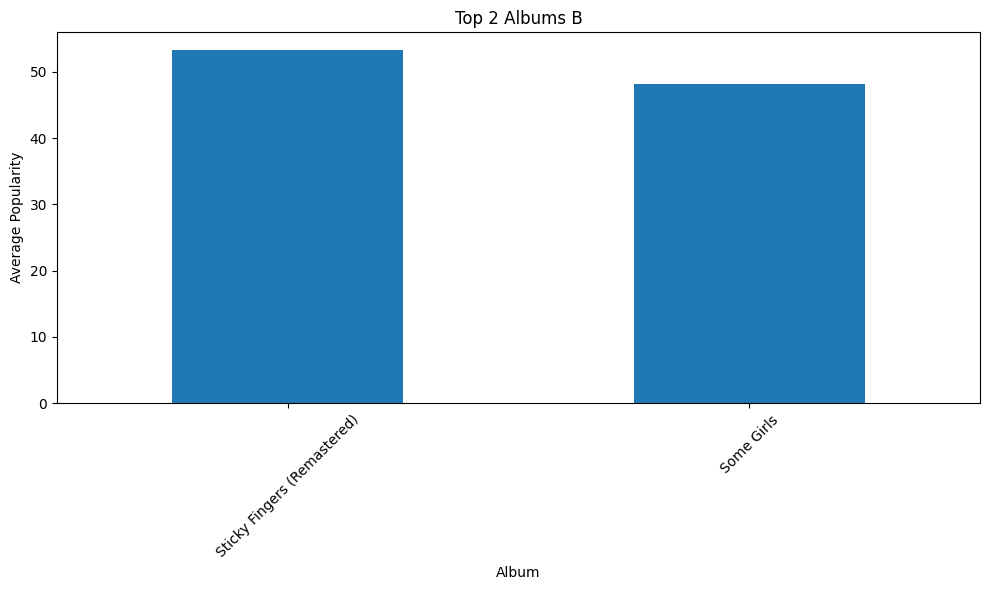

In [ ]:
# Create a bar chart to visualize the top 2 albums
plt.figure(figsize=(10, 6))

top_albums.plot(kind='bar', xlabel='Album', ylabel='Average Popularity', title='Top 2 Albums B')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

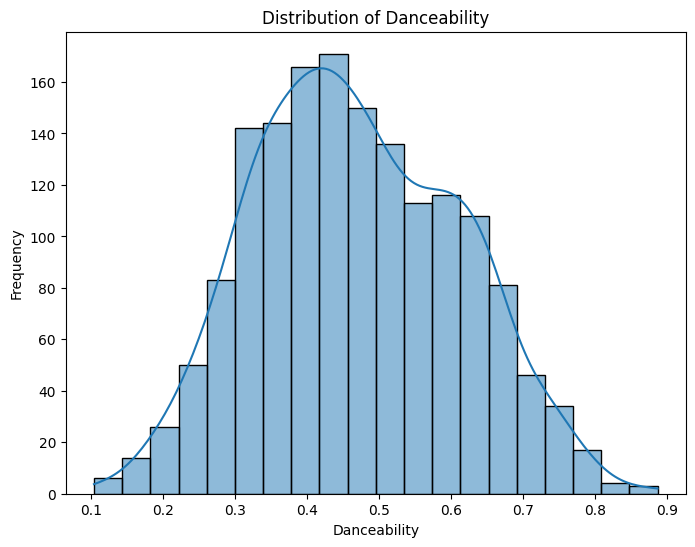

In [ ]:
# EDA
# distribution of danceability
plt.figure(figsize=(8, 6))
sns.histplot(data['danceability'], bins=20, kde=True)
plt.xlabel('Danceability')
plt.ylabel('Frequency')
plt.title('Distribution of Danceability')
plt.show()

In [36]:
 #Find the row containing the non-numeric value
non_numeric_row = data[data['Unnamed: 0'] == 'Concert Intro Music - Live']

# Print the row
print(non_numeric_row)

Empty DataFrame
Columns: [Unnamed: 0, name, album, release_date, track_number, id, uri, acousticness, danceability, energy, instrumentalness, liveness, loudness, speechiness, tempo, valence, popularity, duration_ms]
Index: []


In [37]:
data['Unnamed: 0'] = pd.to_numeric(data['Unnamed: 0'], errors='coerce')

In [39]:
correlation_matrix = data.corr(numeric_only=True)

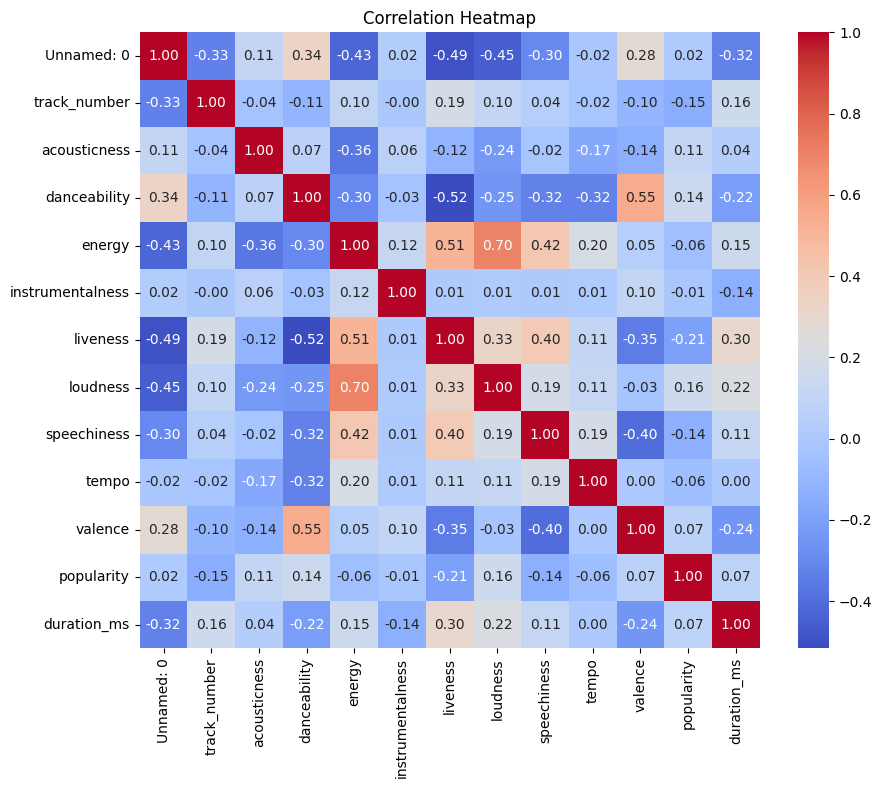

In [40]:
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

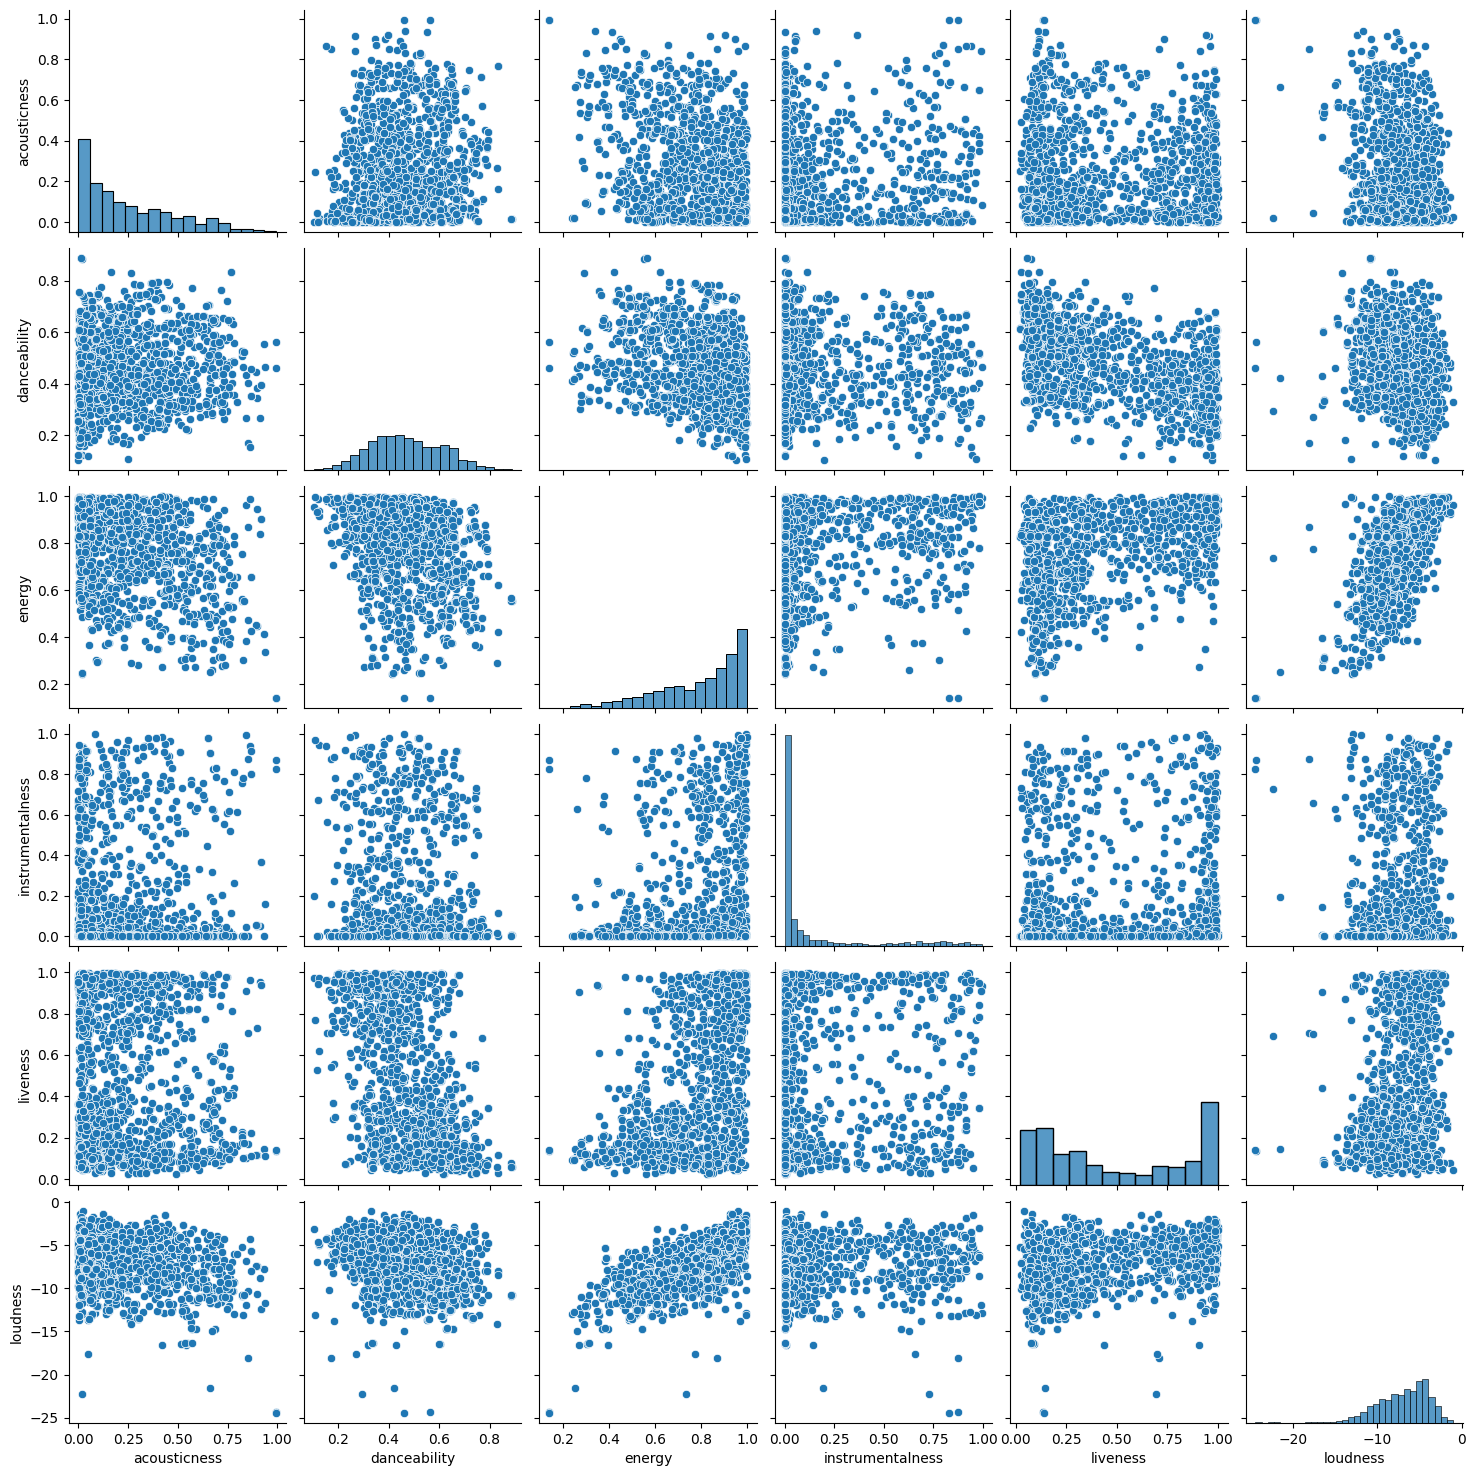

In [41]:
import seaborn as sns
# Subset the data for EDA
eda_data = data[['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness']]
# Pairplot to visualize relationships between features
sns.pairplot(eda_data)
plt.show()

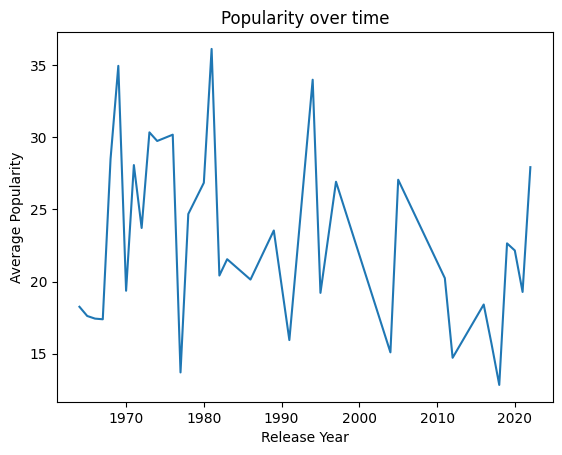

In [43]:

# Convert the release_date column to a datetime object
data['release_date'] = pd.to_datetime(data['release_date'])
# Extract the year from the release_date
data['release_year'] = data['release_date'].dt.year
# Group data by release year and calculate the average popularity
popularity_over_time = data.groupby('release_year')['popularity'].mean()
# Line plot for popularity over time
popularity_over_time.plot(kind='line', xlabel='Release Year', ylabel='Average Popularity', title = 'Popularity over time')
plt.show()


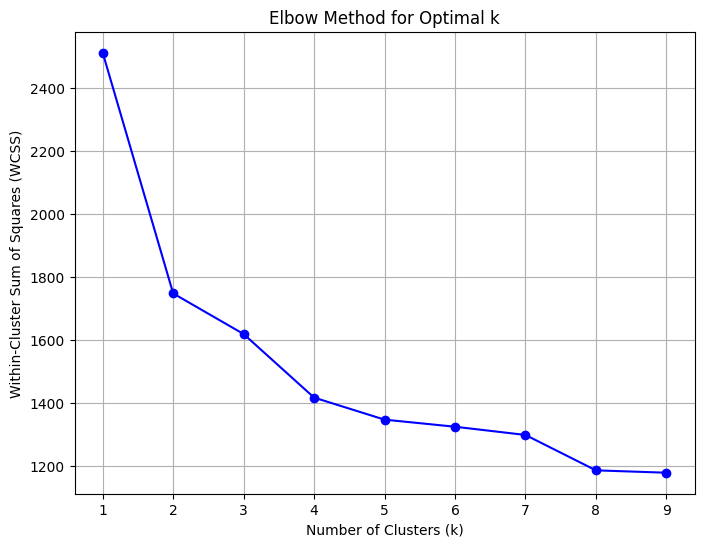

Cluster 1
Centroid Used: [-0.60931236 -0.09898065], No. of Records: 1071
Cluster 2
Centroid Used: [1.21071157 0.19667584], No. of Records: 539


In [49]:
# Cluster Analysis
selected_features = data[['acousticness', 'danceability']]
# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(selected_features)
k_values = range(1, 10)
wcss_values = []
max_iters = 100
for k in k_values:
 np.random.seed(0)
 centroids = X[np.random.choice(X.shape[0], k, replace=False)]
 for iteration in range(max_iters):

  distances = np.sqrt(np.sum((X[:, np.newaxis] - centroids) ** 2, axis=2))
  labels = np.argmin(distances, axis=1)
  new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
 if np.all(centroids == new_centroids):

   break
 centroids = new_centroids

 # Calculate WCSS
 wcss = np.sum(np.min(distances, axis=1))
 wcss_values.append(wcss)
# Plot the WCSS values for each k
plt.figure(figsize=(8, 6))
plt.plot(k_values, wcss_values, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.grid(True)
plt.show()
# Find the optimal value of k (elbow method)
optimal_k = np.argmin(np.diff(wcss_values)) + 2
k = optimal_k
np.random.seed(0)
centroids = X[np.random.choice(X.shape[0], k, replace=False)]
for iteration in range(max_iters):
 distances = np.sqrt(np.sum((X[:, np.newaxis] - centroids) ** 2, axis=2))
 labels = np.argmin(distances, axis=1)
 new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
 if np.all(centroids == new_centroids):

  break
 centroids = new_centroids
# Count and print the number of data points in each cluster
cluster_counts = np.bincount(labels)
for i in range(k):
 print(f"Cluster {i+1}")
 print(f"Centroid Used: {centroids[i]}, No. of Records: {cluster_counts[i]}")

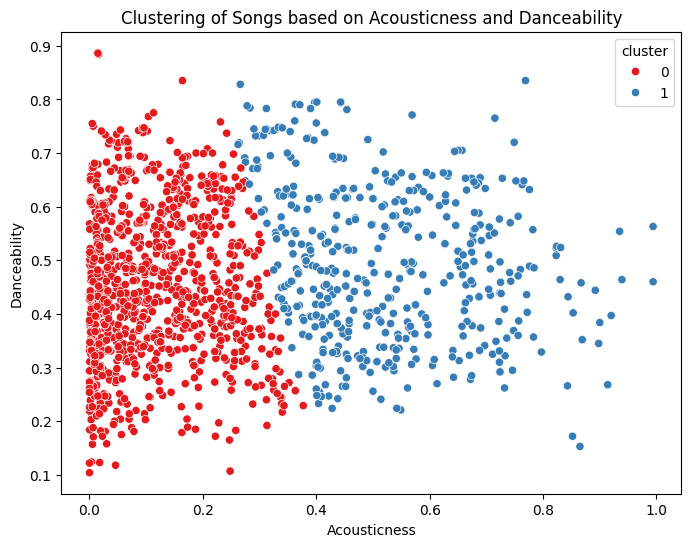

In [52]:
# Add cluster labels to the original dataset
data['cluster'] = labels
# Visualize the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='acousticness', y='danceability', hue='cluster', data=data, palette='Set1')
plt.xlabel('Acousticness')
plt.ylabel('Danceability')
plt.title('Clustering of Songs based on Acousticness and Danceability')
plt.show()

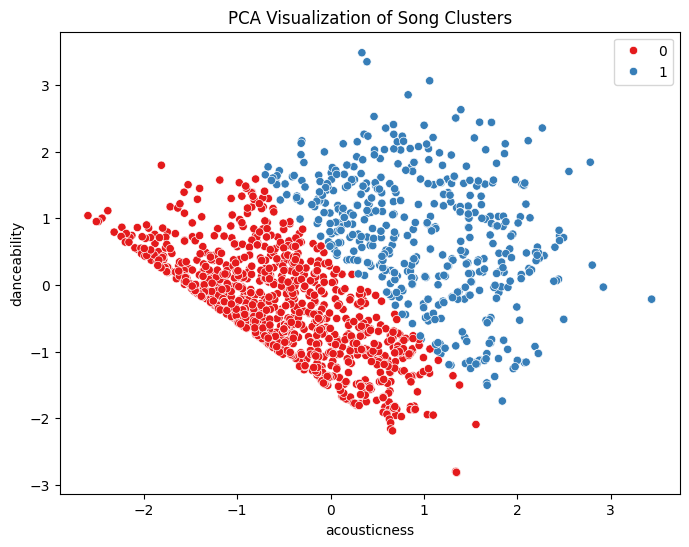

In [53]:
# Dimensionality Reduction (PCA)
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(X)
# Visualize the data after dimensionality reduction
plt.figure(figsize=(8, 6))
sns.scatterplot(x=reduced_features[:, 0], y=reduced_features[:, 1], hue=labels, palette='Set1')
plt.xlabel('acousticness')
plt.ylabel('danceability')
plt.title('PCA Visualization of Song Clusters')
plt.show()